<a href="https://colab.research.google.com/github/aurorarch/Twitter-Sentiment/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import requests

CSV_URL = 'https://raw.githubusercontent.com/sharmaroshan/Twitter-Sentiment-Analysis/master/train_tweet.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

In [ ]:
import pandas as pd

data = pd.DataFrame(my_list,columns = my_list[0])
data = data[1:]

In [ ]:
print(data.shape)
data.head()

(31962, 2)


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
data.drop(['id'],axis=1,inplace=True)

In [ ]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
data.iloc[4]

label    None
tweet    None
Name: 5, dtype: object

In [ ]:
#removing rows that contain none
data = data.drop(data[~data['label'].isin(['0','1'])].index)
data = data.reset_index(drop=True)
data.shape

(31962, 2)

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

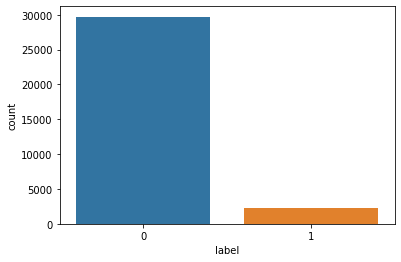

In [ ]:
sns.countplot(x = 'label', data=data)

In [ ]:
data['label'] = data['label'].astype(int)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def clean_text(x):
  x = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]",'',x)
  x = x.lower()
  x = x.split()
  x = [i for i in x if not i in stopwords]
  x = " ".join(x)
  return x

In [ ]:
corpus = []

ps = PorterStemmer()
stopwords = set(stopwords.words('english'))

for i in range (data.shape[0]):
  text = clean_text(data.tweet[i])
  corpus.append(text)

print(np.shape(corpus))

(31962,)


In [ ]:
bagofwords = []

for i in range(data.shape[0]):
  words = corpus[i].split()
  bagofwords.append(words)

In [ ]:
import itertools
import collections

all_words = list(itertools.chain(*bagofwords))
print(all_words[0:20])

freq = collections.Counter(all_words)
freq.most_common(20)

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run', 'thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked']


[('love', 2720),
 ('day', 2286),
 ('happy', 1688),
 ('amp', 1607),
 ('im', 1155),
 ('u', 1148),
 ('time', 1126),
 ('life', 1124),
 ('like', 1053),
 ('today', 1008),
 ('new', 987),
 ('positive', 934),
 ('thankful', 925),
 ('get', 919),
 ('people', 865),
 ('bihday', 852),
 ('good', 850),
 ('cant', 813),
 ('one', 782),
 ('see', 757)]

In [ ]:
freq_df = pd.DataFrame(freq.most_common(20),columns=['word','freq'])
freq_df.head()

,word,freq
0,love,2720
1,day,2286
2,happy,1688
3,amp,1607
4,im,1155


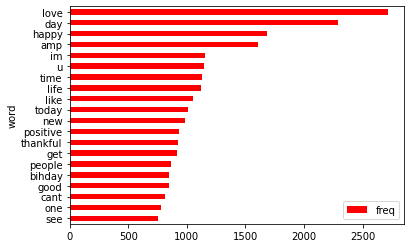

In [ ]:
freq_df.sort_values(by='freq').plot.barh(x='word',y='freq',color='red')

In [ ]:
from textblob import TextBlob
sentiment = [TextBlob(tweet) for tweet in corpus]
print(sentiment[99])
print(sentiment[99].polarity)

personalised gbp get shop cool home fun
0.32499999999999996


In [ ]:
sentiment_df = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment]
sentiment_df = pd.DataFrame(sentiment_df, columns=['polarity','tweets'])
sentiment_df.sort_values(by='polarity',ascending=False).head(10)

,polarity,tweets
12454,1.0,day u c best luck santa ono missed
14271,1.0,always perfect formentera wildisland longweeke...
20335,1.0,best peach pancakes hash browns wildwood vacat...
28141,1.0,kids campers best holiday u need best camperva...
30457,1.0,simply best
23918,1.0,church best place sunday morning stayinlove
24560,1.0,fathers day wonderful dads
8726,1.0,best homeopathic remedies anxiety altwaystohea...
9221,1.0,expes explain best way deal friends amp family
4598,1.0,would rather involved bullshit politics commun...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bfe60240>]],
      dtype=object)

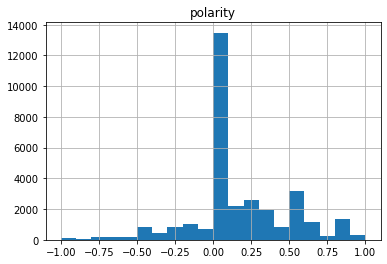

In [ ]:
sentiment_df.hist(bins=20)

In [ ]:
TXT_URL = "https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-111.txt"

with requests.Session() as s:
    download = s.get(TXT_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter='\t')
    text_list = list(cr)

In [ ]:
word_dic = {}
for elem in text_list:
  word_dic[elem[0]] = elem[1]

In [ ]:
word_dic

In [ ]:
strength = []
for tweet in bagofwords:
  score = 0
  for word in tweet:
    if word in word_dic.keys():
      score = score + int(word_dic.get(word))
  strength.append(score)

In [ ]:
strength

[-6,
 2,
 0,
 3,
 1,
 -1,
 0,
 -3,
 3,
 2,
 0,
 -3,
 0,
 0,
 0,
 0,
 6,
 1,
 2,
 0,
 1,
 -1,
 3,
 0,
 0,
 6,
 5,
 3,
 3,
 0,
 5,
 0,
 3,
 -2,
 1,
 1,
 0,
 0,
 -1,
 8,
 0,
 5,
 1,
 1,
 6,
 6,
 3,
 -2,
 1,
 3,
 0,
 3,
 0,
 0,
 8,
 0,
 4,
 3,
 0,
 0,
 3,
 0,
 2,
 0,
 1,
 -2,
 3,
 3,
 3,
 4,
 2,
 4,
 0,
 1,
 2,
 -1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 -6,
 4,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 3,
 0,
 0,
 5,
 -2,
 -1,
 0,
 0,
 0,
 9,
 -3,
 0,
 0,
 3,
 0,
 -1,
 2,
 3,
 -2,
 0,
 8,
 3,
 5,
 -4,
 0,
 -3,
 -3,
 3,
 -2,
 0,
 0,
 -5,
 2,
 -3,
 9,
 -2,
 0,
 2,
 -5,
 0,
 3,
 3,
 6,
 0,
 0,
 0,
 0,
 -5,
 3,
 0,
 0,
 0,
 10,
 4,
 9,
 -2,
 0,
 -1,
 0,
 -8,
 -2,
 6,
 0,
 0,
 0,
 0,
 3,
 0,
 4,
 3,
 3,
 0,
 -2,
 1,
 4,
 0,
 0,
 -2,
 -2,
 4,
 -9,
 6,
 0,
 0,
 -5,
 8,
 3,
 0,
 3,
 0,
 1,
 1,
 -1,
 6,
 6,
 12,
 0,
 3,
 -2,
 0,
 1,
 -3,
 1,
 0,
 2,
 2,
 0,
 4,
 6,
 -3,
 0,
 8,
 3,
 -10,
 -3,
 6,
 2,
 0,
 2,
 4,
 -4,
 0,
 3,
 1,
 0,
 9,
 6,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 5,
 5,
 7,
 0,
 0,
 0,


In [ ]:
strength_df = pd.DataFrame({'Strength':strength,'Tweet':corpus})

In [ ]:
strength_df.head()

,Strength,Tweet
0,-6,father dysfunctional selfish drags kids dysfun...
1,2,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,3,model love u take u time ur
4,1,factsguide society motivation


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47b22ce208>]],
      dtype=object)

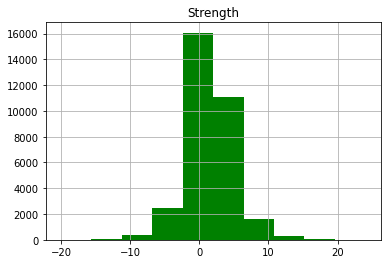

In [ ]:
strength_df.hist(bins=10, color='green')

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_df = vectorizer.fit_transform(corpus).toarray()

In [ ]:
one = data[data['label']=='1']
zero = data[data['label']=='0']

print(one.shape)
print(zero.shape)

(2242, 2)
(29720, 2)


In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X_res,y_res = nm.fit_sample(processed_df,data.label)
print(X_res.shape)
print(y_res.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(4484, 2500)
(4484,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3587, 2500)
(897, 2500)
(3587,)
(897,)


In [ ]:
type(y_test[1])

numpy.int64

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       466
           1       0.84      0.79      0.81       431

    accuracy                           0.83       897
   macro avg       0.83      0.82      0.83       897
weighted avg       0.83      0.83      0.83       897

[[402  64]
 [ 92 339]]
0.8260869565217391


Naive Bayes